In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.interpolate import UnivariateSpline
from torch.utils.data import TensorDataset, DataLoader
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.metrics import accuracy_score

%matplotlib inline

# Import EGC csv data

In [4]:
ECG_data_in = pd.read_csv('/Users/psi/Documents/Machine_learning/Taiwan_intern/data/0618_2020_case1_2_6_by ml_A.csv')

## Checking the data 

In [3]:
print(ECG_data_in.iloc[:,5:].values.max())
print(ECG_data_in.iloc[:,5:].values.min())


239
-180


In [5]:
print(ECG_data_in.shape)
ECG_data_in.head()

(2140, 65)


,phistnum,datetime,data skip,contraction,Intensity,0,1,2,3,4,...,50,51,52,53,54,55,56,57,58,59
0,3923710,2020/5/28 18:53,False,True,70,-143,-144,-143,-139,137,...,134,135,135,135,134,136,132,133,131,-130
1,3923710,2020/5/28 18:53,False,True,70,35,30,30,27,29,...,44,43,42,41,40,39,40,39,39,37
2,3923710,2020/5/28 18:54,False,True,70,36,36,36,37,35,...,21,21,21,22,21,22,22,21,21,21
3,3923710,2020/5/28 18:54,False,False,22,-132,132,131,131,133,...,140,138,133,134,131,133,136,138,139,140
4,3923710,2020/5/28 18:55,False,False,22,28,26,28,29,30,...,49,51,54,56,58,61,62,64,68,69


In [6]:
IDs = list(set(ECG_data_in.iloc[:,0].values))

In [7]:
ECG_data = ECG_data_in.copy()#drop(columns = ['Intensity'])

## Preparing the data

In [8]:
data_1 = ECG_data[ECG_data['phistnum'] == IDs[0]]
data_2 = ECG_data[ECG_data['phistnum'] == IDs[1]]
data_3 = ECG_data[ECG_data['phistnum'] == IDs[2]]

#data_t = EGC_data[np.logical_or((EGC_data['phistnum'] == IDs[1]),(EGC_data['phistnum'] == IDs[2]))]

#===== Remove skipped data =====
#data_1 = data_1[data_1['data skip'] == False]
#data_2 = data_2[data_2['data skip'] == False]
#data_3 = data_3[data_3['data skip'] == False]

ECG_data_clean = ECG_data[ECG_data['data skip'] == False]

In [341]:
print(data_1.shape,data_2.shape,data_3.shape,data_t.shape)

(267, 65) (1020, 65) (853, 65) (1873, 65)


In [9]:
train_data_1 = data_1.iloc[:,4:].values
train_data_2 = data_2.iloc[:,4:].values
train_data_3 = data_3.iloc[:,4:].values

train_y_1 = data_1.iloc[:,3].values.astype(int)
train_y_2 = data_2.iloc[:,3].values.astype(int)
train_y_3 = data_3.iloc[:,3].values.astype(int)

skip_1 = data_1.iloc[:,2].values.astype(int)
skip_2 = data_2.iloc[:,2].values.astype(int)
skip_3 = data_3.iloc[:,2].values.astype(int)

#whole_data = EGC_data_clean.iloc[:,5:].values

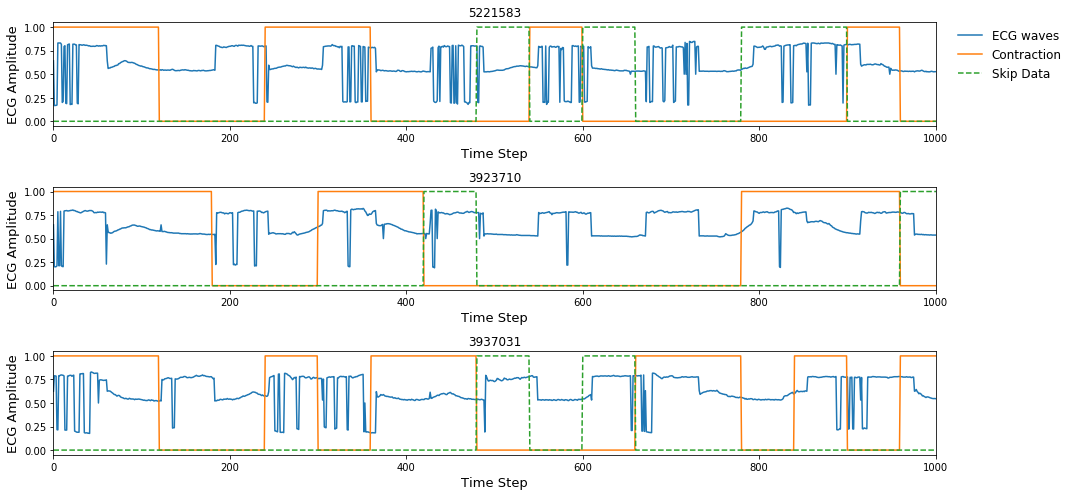

In [192]:
contraction_1 = []
for sig in train_y_1:
    for i in range(60):
        contraction_1.append(sig)
        
contraction_2 = []
for sig in train_y_2:
    for i in range(60):
        contraction_2.append(sig) 
        
contraction_3 = []
for sig in train_y_3:
    for i in range(60):
        contraction_3.append(sig) 
        
skip_data_1 = []
for sig in skip_1:
    for i in range(60):
        skip_data_1.append(sig)
        
skip_data_2 = []
for sig in skip_2:
    for i in range(60):
        skip_data_2.append(sig) 
        
skip_data_3 = []
for sig in skip_3:
    for i in range(60):
        skip_data_3.append(sig)         
        

plt.figure(figsize=[15.0,7.0])
plt.subplot(311)
plt.plot((train_data_1.flatten()-(-240))/(240*2.0),label = 'ECG waves')
plt.plot(contraction_1,label = 'Contraction')
plt.plot(skip_data_1,'--',label = 'Skip Data')
plt.xlim(0,1000)
plt.xlabel('Time Step',fontsize=13)
plt.ylabel('ECG Amplitude',fontsize=13)
plt.title(IDs[0])
plt.legend(bbox_to_anchor=(1.02, 0.4),loc=3, borderaxespad=0.,prop={'size':12},frameon=False)



plt.subplot(312)
plt.plot((train_data_2.flatten()-(-240))/(240*2.0))
plt.plot(contraction_2)
plt.plot(skip_data_2,'--')
plt.xlim(0,1000)
plt.xlabel('Time Step',fontsize=13)
plt.ylabel('ECG Amplitude',fontsize=13)
plt.title(IDs[1])

plt.subplot(313)
plt.plot((train_data_3.flatten()-(-240))/(240*2.0))
plt.plot(contraction_3)
plt.plot(skip_data_3,'--')
plt.xlim(0,1000)
plt.xlabel('Time Step',fontsize=13)
plt.ylabel('ECG Amplitude',fontsize=13)
plt.title(IDs[2])

plt.tight_layout()

plt.savefig('/Users/psi/Documents/Machine_learning/Taiwan_intern/plots/ECG.png')

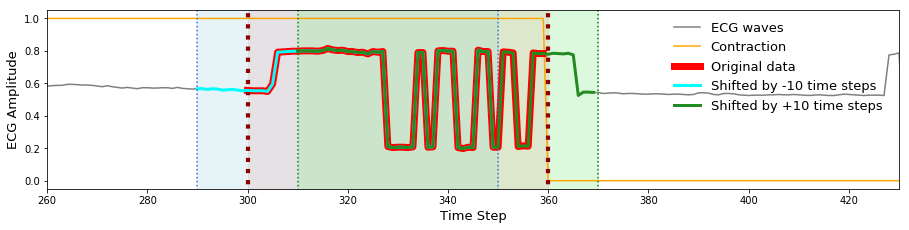

In [190]:
wave_loc = 300      
        

plt.figure(figsize=[13.0,3.3])

#plt.subplot(211)
plt.plot((train_data_1.flatten()-(-240))/(240*2.0),color='grey',label = 'ECG waves')
plt.plot(contraction_1,color='orange',label = 'Contraction')
#plt.plot(skip_data_1,'--',label = 'Skip Data')
plt.plot(np.arange(wave_loc,wave_loc+60),(train_data_1.flatten()[wave_loc:wave_loc+60]-(-240))/(240*2.0),color='red',lw=7,label = 'Original data')
x_t = np.zeros(2)
y_t = np.zeros(2)
x_t += wave_loc
y_t[0] = 1.1
y_t[1] = -0.1
plt.plot(x_t,y_t,':',lw=4.2,color='darkred')
x_t2 = np.zeros(2)
x_t2 += wave_loc+60
plt.plot(x_t2,y_t,':',lw=4.2,color='darkred')
plt.fill_betweenx(y_t,x_t,x_t2,color='red',alpha=0.1)

plt.plot(np.arange(wave_loc-10,wave_loc+60-10),(train_data_1.flatten()[wave_loc-10:wave_loc+60-10]-(-240))/(240*2.0),color='cyan',lw=3,label = 'Shifted by -10 time steps')
x_t = np.zeros(2)
y_t = np.zeros(2)
x_t += wave_loc-10
y_t[0] = 1.1
y_t[1] = -0.1
plt.plot(x_t,y_t,':',lw=1.5,color='royalblue')
x_t2 = np.zeros(2)
x_t2 += wave_loc+60-10
plt.plot(x_t2,y_t,':',lw=1.5,color='royalblue')
plt.fill_betweenx(y_t,x_t,x_t2,color='lightblue',alpha=0.3)

plt.plot(np.arange(wave_loc+10,wave_loc+60+10),(train_data_1.flatten()[wave_loc+10:wave_loc+60+10]-(-240))/(240*2.0),color='forestgreen',lw=3,label = 'Shifted by +10 time steps')
x_t = np.zeros(2)
y_t = np.zeros(2)
x_t += wave_loc+10
y_t[0] = 1.1
y_t[1] = -0.1
plt.plot(x_t,y_t,':',lw=1.5,color='green')
x_t2 = np.zeros(2)
x_t2 += wave_loc+60+10
plt.plot(x_t2,y_t,':',lw=1.5,color='green')
plt.fill_betweenx(y_t,x_t,x_t2,color='lightgreen',alpha=0.3)



plt.xlim(wave_loc-40,wave_loc+60+70)
plt.xlabel('Time Step',fontsize=13)
plt.ylabel('ECG Amplitude',fontsize=13)
plt.ylim(-0.05,1.05)

plt.legend(bbox_to_anchor=(0.73, 0.4),loc=3, borderaxespad=0.,prop={'size':13},frameon=False)

plt.tight_layout()

plt.savefig('/Users/psi/Documents/Machine_learning/Taiwan_intern/plots/ECG_shifted.png')

In [13]:
def survival_t(contraction_data, skip_data):
    
    ct = 0
    sv_t = []
    for is_skipped, is_contraction in zip(skip_data, contraction_data):
        if (is_contraction):
            if (not is_skipped):
                ct +=1
        else:
            if(ct != 0):
                sv_t.append(ct)
            ct = 0
    return sv_t


In [16]:
sv_t_1 = survival_t(train_y_1, skip_1)         
#print(sv_t_1)
print('mean:',np.mean(sv_t_1)*30/60,'std:',np.std(sv_t_1)*30/60)
sv_t_2 = survival_t(train_y_2, skip_2)         
#print(sv_t_2)
print('mean:',np.mean(sv_t_2)*30/60,'std:',np.std(sv_t_2)*30/60)
sv_t_3 = survival_t(train_y_3, skip_3)         
#print(sv_t_2)
print('mean:',np.mean(sv_t_3)*30/60,'std:',np.std(sv_t_3)*30/60)

mean: 0.7627118644067796 std: 0.31022042741903605
mean: 0.9159663865546218 std: 0.3569203459091647
mean: 0.7400881057268722 std: 0.26685637904899895


# Machine Learning

## Preparing data

In [14]:
ECG_data_clean = ECG_data[ECG_data['data skip'] == False]
test_data_in = ECG_data_clean[ECG_data_clean['phistnum'] == IDs[0]]
train_data_in = ECG_data_clean[np.logical_or(ECG_data_clean['phistnum'] == IDs[1], ECG_data_clean['phistnum'] == IDs[2])]

train_data = train_data_in.iloc[:,5:].values
test_data = test_data_in.iloc[:,5:].values

train_y = train_data_in.iloc[:,3].values.astype(int)
test_y = test_data_in.iloc[:,3].values.astype(int)

In [18]:
print(test_data.shape)
print(train_data.shape)
print(test_y.shape)
print(train_y.shape)

(204, 60)
(1188, 60)
(204,)
(1188,)


## Data augmentation

In [19]:
def data_augmentation(data, y, app_len):
    data_m=[]
    y_m=[]
    
    data_m.append(data[0,:])
    data_m.append(np.concatenate((data[0,app_len:],data[1,0:app_len])))
    y_m.append(y[0])
    y_m.append(y[0])
    for i in range(1,data.shape[0]-1):
        data_m.append(np.concatenate((data[i-1,60-app_len:],data[i,0:60-app_len])))
        data_m.append(data[i,:])
        data_m.append(np.concatenate((data[i,app_len:],data[i+1,0:app_len])))
        y_m.append(y[i])
        y_m.append(y[i])
        y_m.append(y[i])

    data_m.append(np.concatenate((data[data.shape[0]-2,60-app_len:],data[data.shape[0]-1,0:60-app_len])))    
    data_m.append(data[data.shape[0]-1,:])
    y_m.append(y[data.shape[0]-1])
    y_m.append(y[data.shape[0]-1])
    data_m = np.array(data_m)
    y_m = np.array(y_m)
    return data_m, y_m

In [272]:
test_data_m, test_y_m = data_augmentation(test_data, test_y, 10)
train_data_m, train_y_m = data_augmentation(train_data, train_y, 10)
print(test_data.shape,test_y.shape,test_data_m.shape,test_y_m.shape)
print(train_data.shape,train_y.shape,train_data_m.shape,train_y_m.shape)

(267, 60) (267,) (799, 60) (799,)
(1873, 60) (1873,) (5617, 60) (5617,)


In [19]:
norm = StandardScaler()
norm.fit(train_data)
train_data = norm.transform(train_data)
test_data = norm.transform(test_data)

In [274]:
train_y = train_y_m
test_y = test_y_m

## Decision Tree

In [21]:
from sklearn import tree
from sklearn.preprocessing import StandardScaler

In [33]:
clf = tree.DecisionTreeClassifier(random_state=0)
clf = clf.fit(train_data, train_y)
prediction = clf.predict(test_data)
print('Accuracy Score:',accuracy_score(prediction, test_y))

Accuracy Score: 0.6078431372549019


### Plotting learning curve

In [26]:
from sklearn.model_selection import learning_curve

In [59]:
ECG_data_clean = ECG_data[ECG_data['data skip'] == False]

lc_data = ECG_data_clean.iloc[:,5:].values
lc_y = ECG_data_clean.iloc[:,3].values.astype(int)

norm = StandardScaler()
norm.fit(lc_data)
lc_data = norm.transform(lc_data)


In [56]:
def learning_curve_gen(estimator, lc_data, lc_y):
    train_sizes, train_scores, test_scores = learning_curve(estimator, lc_data, lc_y,train_sizes=np.linspace(.1, 1.0, 5))
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    return train_scores_mean, train_scores_std, test_scores_mean, test_scores_std



In [57]:
def learning_curve_plot(lc_data,train_scores_mean, train_scores_std, test_scores_mean, test_scores_std,model_name,fig_name,put_legend = False):
    plt.grid()
    plt.plot(np.linspace(.1, 1.0, 5)*lc_data.shape[0],train_scores_mean,color='red',lw=1.5,label = 'Training Score')
    plt.scatter(np.linspace(.1, 1.0, 5)*lc_data.shape[0],train_scores_mean,marker='o',color='red',s=40)
    plt.fill_between(np.linspace(.1, 1.0, 5)*lc_data.shape[0],train_scores_mean-train_scores_std,train_scores_mean+train_scores_std,color='red',alpha=0.15)
    plt.plot(np.linspace(.1, 1.0, 5)*lc_data.shape[0],test_scores_mean,color='forestgreen',label = 'Test Score')
    plt.scatter(np.linspace(.1, 1.0, 5)*lc_data.shape[0],test_scores_mean,marker='o',color='forestgreen',s=40)
    plt.fill_between(np.linspace(.1, 1.0, 5)*lc_data.shape[0],test_scores_mean-test_scores_std,test_scores_mean+test_scores_std,color='forestgreen',alpha=0.15)
    plt.xlabel('Training Examples',fontsize=15)
    plt.ylabel('Score',fontsize=15)
    plt.ylim(0.58,1.02)
    plt.title('Learning Curves ('+model_name+')',fontsize=16)
    if (put_legend):
        plt.legend(bbox_to_anchor=(0.52, 0.62),loc=3, borderaxespad=0.,prop={'size':13},frameon=True)

    plt.tight_layout()
    plt.savefig('/Users/psi/Documents/Machine_learning/Taiwan_intern/plots/'+fig_name)

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


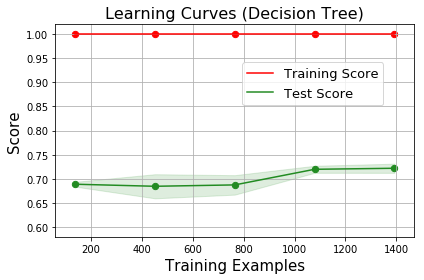

In [60]:
estimator=tree.DecisionTreeClassifier()
train_scores_mean, train_scores_std, test_scores_mean, test_scores_std = learning_curve_gen(estimator, lc_data, lc_y)
model_name = 'Decision Tree'
fig_name = 'Decision_Tree_LC_t.png'
learning_curve_plot(lc_data,train_scores_mean, train_scores_std, test_scores_mean, test_scores_std,model_name,fig_name, put_legend = True)

## Random Forest

In [31]:
from sklearn.ensemble import RandomForestClassifier

In [34]:
#clf_rf=RandomForestClassifier(random_state=0,n_estimators=800,criterion = 'entropy')
clf_rf=RandomForestClassifier(random_state=0,n_estimators=800,criterion = 'entropy')

#Train the model using the training sets y_pred=clf.predict(X_test)
clf_rf.fit(train_data, train_y)

prediction_rf=clf_rf.predict(test_data)
print('Accuracy Score:',accuracy_score(prediction_rf, test_y))

Accuracy Score: 0.7058823529411765


### Plotting learning curves

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


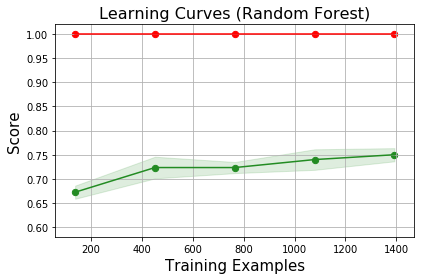

In [61]:
estimator=RandomForestClassifier(random_state=0,n_estimators=800,criterion = 'entropy')
train_scores_mean, train_scores_std, test_scores_mean, test_scores_std = learning_curve_gen(estimator, lc_data, lc_y)
model_name = 'Random Forest'
fig_name = 'Random_Forest_LC_2.png'
learning_curve_plot(lc_data,train_scores_mean, train_scores_std, test_scores_mean, test_scores_std,model_name,fig_name)

## Gradient Boosting

In [36]:
from sklearn.ensemble import GradientBoostingClassifier

In [38]:
#clf_gb=GradientBoostingClassifier(random_state=0,learning_rate= 0.6,n_estimators= 88)
#clf_gb=GradientBoostingClassifier(random_state=0,learning_rate= 0.6,n_estimators= 700)
#clf_gb=GradientBoostingClassifier(random_state=0,learning_rate= 0.6,n_estimators= 700)
clf_gb=GradientBoostingClassifier(random_state=0,learning_rate= 0.9,n_estimators= 900)



#Train the model using the training sets y_pred=clf.predict(X_test)
clf_gb.fit(train_data, train_y)

prediction_gb=clf_gb.predict(test_data)
print('Accuracy Score:',accuracy_score(prediction_gb, test_y))

Accuracy Score: 0.6519607843137255


/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


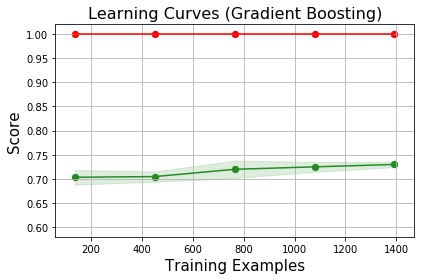

In [62]:
estimator=GradientBoostingClassifier(random_state=0,learning_rate= 0.9,n_estimators= 900)
train_scores_mean, train_scores_std, test_scores_mean, test_scores_std = learning_curve_gen(estimator, lc_data, lc_y)
model_name = 'Gradient Boosting'
fig_name = 'Gradient_Boosting_LC_2.png'
learning_curve_plot(lc_data,train_scores_mean, train_scores_std, test_scores_mean, test_scores_std,model_name,fig_name)

## Logistic Regression

In [44]:
from sklearn.linear_model import LogisticRegression
#clf = LogisticRegression(random_state=0,solver='sag',tol=1.e-7,max_iter = 500).fit(train_data, train_y)
#clf = LogisticRegression(random_state=0,solver='sag',tol=1.e-8,max_iter = 500).fit(train_data, train_y)
#clf = LogisticRegression(random_state=0,solver='sag',tol=1.e-6,max_iter = 1000).fit(train_data, train_y)
clf = LogisticRegression(random_state=0,solver='sag',tol=1.e-7,max_iter = 700).fit(train_data, train_y)



prediction_lr = clf.predict(test_data)

print('Accuracy Score:',accuracy_score(prediction_lr, test_y))

Accuracy Score: 0.5735294117647058


/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


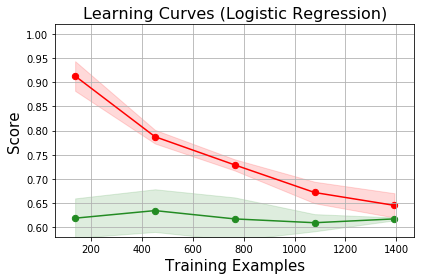

In [63]:
estimator=LogisticRegression(random_state=0,solver='sag',tol=1.e-6,max_iter = 1000)
train_scores_mean, train_scores_std, test_scores_mean, test_scores_std = learning_curve_gen(estimator, lc_data, lc_y)
model_name = 'Logistic Regression'
fig_name = 'Logistic_Regression_LC_2.png'
learning_curve_plot(lc_data,train_scores_mean, train_scores_std, test_scores_mean, test_scores_std,model_name,fig_name)

## KNN

In [49]:
from sklearn.neighbors import KNeighborsClassifier

0.75


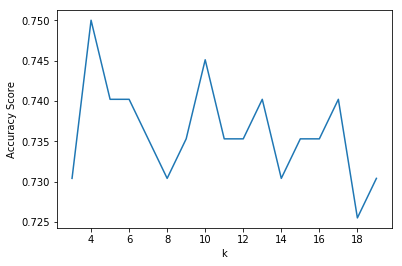

In [50]:
score = []
for i in range(3,20):
    neigh = KNeighborsClassifier(n_neighbors=i+1)
    neigh.fit(train_data, train_y)
    prediction_knn = neigh.predict(test_data)

    score.append(accuracy_score(prediction_knn, test_y))
    
plt.plot(np.arange(3,20),score)
plt.xlabel('k')
plt.ylabel('Accuracy Score')
print(max(score))

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


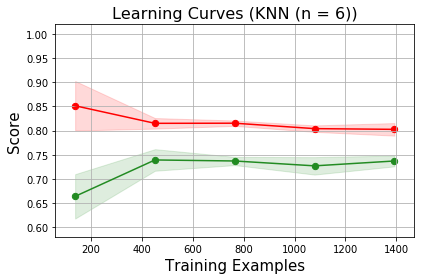

In [64]:
estimator=KNeighborsClassifier(n_neighbors=6)
train_scores_mean, train_scores_std, test_scores_mean, test_scores_std = learning_curve_gen(estimator, lc_data, lc_y)
model_name = 'KNN (n = 6)'
fig_name = 'KNN_LC_2.png'
learning_curve_plot(lc_data,train_scores_mean, train_scores_std, test_scores_mean, test_scores_std,model_name,fig_name)

## Support Vector Machines (SVM)

In [52]:
 from sklearn import svm

In [53]:
#clf = svm.SVC(random_state=0,gamma = 0.8,tol = 1.e-6)
#clf = svm.SVC(random_state=0,gamma = 0.8,tol = 1.e-6)
#svm_clf = svm.SVC(random_state=10,gamma = 0.9,tol = 1.e-6)
svm_clf = svm.SVC(random_state=0,gamma = 0.3,tol = 1.e-6)

svm_clf.fit(train_data, train_y)
prediction_svm = svm_clf.predict(test_data)
print('Accuracy Score:',accuracy_score(prediction_svm, test_y))

Accuracy Score: 0.6911764705882353


/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


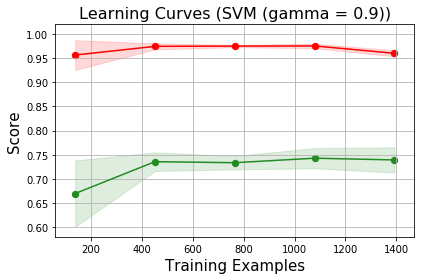

In [65]:
estimator=svm.SVC(random_state=0,gamma = 0.9,tol = 1.e-6)
train_scores_mean, train_scores_std, test_scores_mean, test_scores_std = learning_curve_gen(estimator, lc_data, lc_y)
model_name = 'SVM (gamma = 0.9)'
fig_name = 'SVM_LC_2.png'
learning_curve_plot(lc_data,train_scores_mean, train_scores_std, test_scores_mean, test_scores_std,model_name,fig_name)